In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import skimage.io
import skimage.morphology
import skimage.segmentation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import utils.evaluation

In [4]:
"""get cell numbers; background, cell, boundary ratio for all images
"""

results = pd.DataFrame(columns=["Image", "nb_cell", "ratio1", "ratio2"])

filelist = sorted(os.listdir('DATA/FISH/raw_annotations/'))
filelist = [x for x in filelist if x.endswith('png')]
all_images = filelist[:48]

for image_name in all_images:
    img_filename = os.path.join('DATA/FISH/raw_annotations/', image_name)
    ground_truth = skimage.io.imread(img_filename)
    pred_filename = os.path.join('DATA/FISH/boundary_labels/', image_name)
    prediction = skimage.io.imread(pred_filename)

    results = utils.evaluation.num_analysis(
        ground_truth, 
        prediction, 
        results, 
        image_name
    )

In [5]:
results['nb_cell'].sum()

3145

In [ ]:
"""check downsampling/resize effect on cell images
512-256-128-64-32
"""
img = skimage.io.imread('DATA/FISH/norm_images/' + '0000.png')
annot = skimage.io.imread('DATA/FISH/raw_annotations/' + '0000.png')

from skimage.transform import resize

print("original size: {}".format(img.shape))
r_shape = 64 
img_2 = resize(img, (r_shape, r_shape))
annot_2 = resize(annot, (r_shape, r_shape))

fig, ax = plt.subplots(2,2, figsize=(20,20))
for a1 in ax:
    for a in a1:
        a.set_xticks([])
        a.set_yticks([])
ax[0][0].imshow(img, cmap='gray')
ax[0][1].imshow(annot, cmap='gray')
ax[1][0].imshow(img_2, cmap='gray')
ax[1][1].imshow(annot_2, cmap='gray')


In [27]:
"""quantitively check cell size distribution
"""

filelist = sorted(os.listdir('DATA/FISH/raw_annotations/'))
filelist = [x for x in filelist if x.endswith('png')]
all_images = filelist[48:]

all_area = np.array([])
for i in all_images:
    filename = os.path.join('DATA/FISH/raw_annotations/', image_name)
    ground_truth = skimage.io.imread(filename)
    
    true_objects = len(np.unique(ground_truth))
    area_true = np.histogram(ground_truth, bins=true_objects)[0][1:]
    all_area = np.concatenate((all_area, area_true), axis=0)

(array([1164., 1455., 1455.,  582., 1746.,  873.,    0.,    0.,  291.,
         291.]),
 array([ 617. ,  706.3,  795.6,  884.9,  974.2, 1063.5, 1152.8, 1242.1,
        1331.4, 1420.7, 1510. ]),
 <a list of 10 Patch objects>)

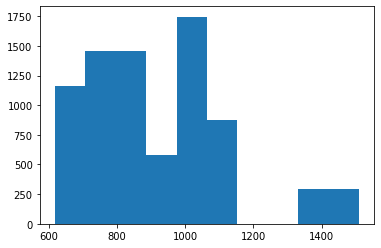

In [28]:
plt.hist(all_area)